In [21]:
import lightning as L
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from scipy import stats
from sklearn.metrics import mean_squared_error
from objetos_rede_neural import *
from lightning.pytorch.loggers import TensorBoardLogger
import os

In [22]:
pip list

Package                       Version
----------------------------- -----------
about-time                    4.2.1
absl-py                       1.3.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.8.1
alive-progress                3.1.4
annotated-types               0.5.0
ansicon                       1.89.0
anyio                         3.7.1
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asteval                       0.9.28
asttokens                     2.1.0
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         23.2.0
autobahn                      22.7.1
autograd                      1.6.2
autopage                      0.5.1
Babel                         2.11.0
backcall                      0.2.0
backoff                       2.2.1
beautifulsou

In [23]:
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.1

SEMENTE_ALEATORIA = 0
NUM_EPOCAS = 30

In [24]:
dm = DataModule(TAMANHO_TESTE, SEMENTE_ALEATORIA)

In [25]:
logger = TensorBoardLogger(save_dir=os.getcwd(), version=1, name="lightning_logs/")
treinador = L.Trainer(logger=False,enable_checkpointing=True,max_epochs=NUM_EPOCAS)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [26]:
num_dados_de_entrada = 5
num_dados_de_saida = 1
neuronios_c1 = 10
neuronios_c2 = 20
neuronios_c3 = 10


minha_mlp = MLP(
    num_dados_de_entrada, neuronios_c1, neuronios_c2,neuronios_c3, num_dados_de_saida
)

In [27]:
treinador.fit(minha_mlp, dm)

c:\venv\ilumpy\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory c:\Users\diogo23039\OneDrive - ILUM ESCOLA DE CIÊNCIA\3º Semestre\Redes Neurais e Algoritmos Genéticos\Trabalho Final de Redes Neurais\Materials-and-their-Mechanical-Properties\Principal\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type       | Params
---------------------------------------
0 | camadas | Sequential | 501   
---------------------------------------
501       Trainable params
0         Non-trainable params
501       Total params
0.002     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


Text(0, 0.5, 'Loss')

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Program Files\Python310\lib\multiprocessing\queues.py", line 239, in _feed
    reader_close()
  File "C:\Program Files\Python310\lib\multiprocessing\connection.py", line 182, in close
    self._close()
  File "C:\Program Files\Python310\lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] Identificador inválido

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\Python310\lib\multiprocessing\queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recen

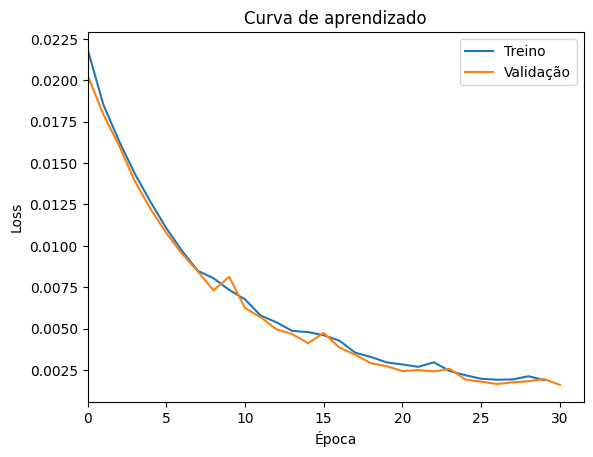

In [28]:
figura, eixo = plt.subplots()

ca_treino = minha_mlp.curva_aprendizado_treino
ca_val = minha_mlp.curva_aprendizado_val

eixo.plot(ca_treino, label="Treino")
eixo.plot(ca_val, label="Validação")

eixo.legend()

eixo.set_xlim(left=0)

eixo.set_title("Curva de aprendizado")
eixo.set_xlabel("Época")
eixo.set_ylabel("Loss")

In [29]:
minha_mlp.eval()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [30]:
dm.setup("test")

with torch.no_grad():
    X_true = dm.X_teste

    y_true = dm.y_teste
    y_true = dm.y_scaler.inverse_transform(y_true)

    y_pred = minha_mlp(X_true)
    y_pred = dm.y_scaler.inverse_transform(y_pred)

    RMSE = mean_squared_error(y_true, y_pred, squared=False)

    print(RMSE)

79.69903788937795


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
pd.read_pickle('../Conjuntos de dados/Dataset.pickle')

,Su,Sy,E,G,mu,Ro
0,421,314,207000,79000,0.3,7860
1,424,324,207000,79000,0.3,7860
2,386,284,207000,79000,0.3,7860
3,448,331,207000,79000,0.3,7860
4,441,346,207000,79000,0.3,7860
...,...,...,...,...,...,...
1539,600,370,169000,70000,0.2,7160
1540,700,420,169000,70000,0.2,7160
1541,800,480,169000,70000,0.2,7160
1542,400,180,160000,64000,0.27,7160


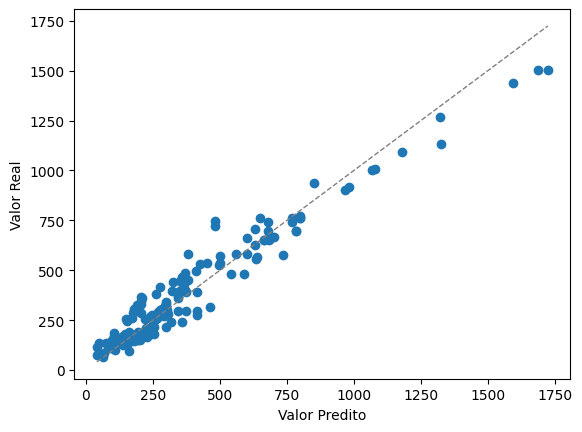

In [32]:
plt.scatter(y_true.ravel(),y_pred.ravel())
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
_ = plt.plot([min(y_true.ravel()), max(y_true.ravel())], [min(y_true.ravel()), max(y_true.ravel())],color = 'gray',linestyle = '--',linewidth = 1)